# Manipulação de Dados

> Dados das aulas disponíveis no [repositório do curso](https://github.com/alura-tech/pos-datascience-analise-e-exploracao-de-dados/archive/refs/heads/Dados.zip) no GitHub

* Referências
  * [DataSUS](https://datasus.saude.gov.br/)
  * [Documentação Pandas](https://pandas.pydata.org/)
  * [Pseudo random numbers](https://www.cambridge.org/engage/api-gateway/coe/assets/orp/resource/item/61b410fadcbea24f839f0235/original/itamaraca-a-novel-simple-way-to-generate-pseudo-random-numbers.pdf)

In [377]:
from urllib.request import urlretrieve
from pathlib import Path
from zipfile import ZipFile

DATA_URL = 'https://github.com/alura-tech/pos-datascience-analise-e-exploracao-de-dados/archive/refs/heads/Dados.zip'
DATA_PATH_RAW = './data/raw'
DATA_PATH_EXTRACTED = './data/interim'

Path(DATA_PATH_RAW).mkdir(parents=True, exist_ok=True)
Path(DATA_PATH_EXTRACTED).mkdir(parents=True, exist_ok=True)

urlretrieve(DATA_URL, DATA_PATH_RAW + '/data.zip')

with ZipFile(DATA_PATH_RAW + '/data.zip') as zip_ref:
    zip_ref.extractall(DATA_PATH_EXTRACTED)

In [378]:
import pandas as pd

In [379]:
FILE_PATH = './data/interim/pos-datascience-analise-e-exploracao-de-dados-Dados/A150850189_28_143_208.csv'

df = pd.read_csv(FILE_PATH,
                 encoding='ISO-8859-1', # Latin One
                 skiprows=3,
                 sep=';',
                 skipfooter=12,
                 thousands='.',
                 decimal=',')

df.shape

/tmp/ipykernel_26067/3580337901.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(FILE_PATH,


(27, 293)

## Parte I

In [380]:
df[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [381]:
df.mean(numeric_only=True)

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2021/Mai    8.727186e+07
2021/Jun    7.759041e+07
2021/Jul    6.084629e+07
2021/Ago    4.388572e+07
Total       6.852321e+09
Length: 170, dtype: float64

In [382]:
df.mean(numeric_only=True).index

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2020/Dez', '2021/Jan', '2021/Fev', '2021/Mar', '2021/Abr', '2021/Mai',
       '2021/Jun', '2021/Jul', '2021/Ago', 'Total'],
      dtype='object', length=170)

In [383]:
colunas_usaveis = df.mean(numeric_only=True).index.tolist()

print('Tamanho colunas_usaveis:', len(colunas_usaveis))

Tamanho colunas_usaveis: 170


In [384]:
colunas_usaveis.insert(0, 'Unidade da Federação')

print('Tamanho colunas_usaveis', len(colunas_usaveis))
colunas_usaveis[:5]

Tamanho colunas_usaveis 171


['Unidade da Federação', '2007/Ago', '2007/Set', '2007/Out', '2007/Nov']

In [385]:
df[colunas_usaveis].head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,9469279.43,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,1.088060e+09
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,4.752903e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,21911210.94,27406458.57,22341042.63,27923786.94,24515920.09,23973537.71,22175398.40,21614943.55,13806958.66,2.061943e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3681417.80,3475205.55,3320807.96,2907871.07,3.525463e+08
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,37925512.28,39042349.46,37113440.70,49625416.13,52558327.29,50907226.77,43876590.47,33718084.12,20837865.89,4.968812e+09


In [386]:
df_1 = df[colunas_usaveis]

df_1.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,9469279.43,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,1.088060e+09
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,4.752903e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,21911210.94,27406458.57,22341042.63,27923786.94,24515920.09,23973537.71,22175398.40,21614943.55,13806958.66,2.061943e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3681417.80,3475205.55,3320807.96,2907871.07,3.525463e+08
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,37925512.28,39042349.46,37113440.70,49625416.13,52558327.29,50907226.77,43876590.47,33718084.12,20837865.89,4.968812e+09


In [387]:
df_1.set_index('Unidade da Federação', inplace=True)

df_1.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,9469279.43,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,1.088060e+09
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,4.752903e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,21911210.94,27406458.57,22341042.63,27923786.94,24515920.09,23973537.71,22175398.40,21614943.55,13806958.66,2.061943e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3681417.80,3475205.55,3320807.96,2907871.07,3.525463e+08
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,37925512.28,39042349.46,37113440.70,49625416.13,52558327.29,50907226.77,43876590.47,33718084.12,20837865.89,4.968812e+09


In [388]:
df_1['2008/Ago'].head()

Unidade da Federação
11 Rondônia     2938286.29
12 Acre         1886871.84
13 Amazonas     8331763.97
14 Roraima      1045291.11
15 Pará        23259148.28
Name: 2008/Ago, dtype: float64

In [389]:
df_1.loc['12 Acre'].head()

2007/Ago     10470.07
2007/Set     14001.71
2007/Out     86200.85
2007/Nov    301323.68
2007/Dez    769612.36
Name: 12 Acre, dtype: float64

In [390]:
df_1.iloc[1].head()

2007/Ago     10470.07
2007/Set     14001.71
2007/Out     86200.85
2007/Nov    301323.68
2007/Dez    769612.36
Name: 12 Acre, dtype: float64

<Axes: xlabel='Unidade da Federação'>

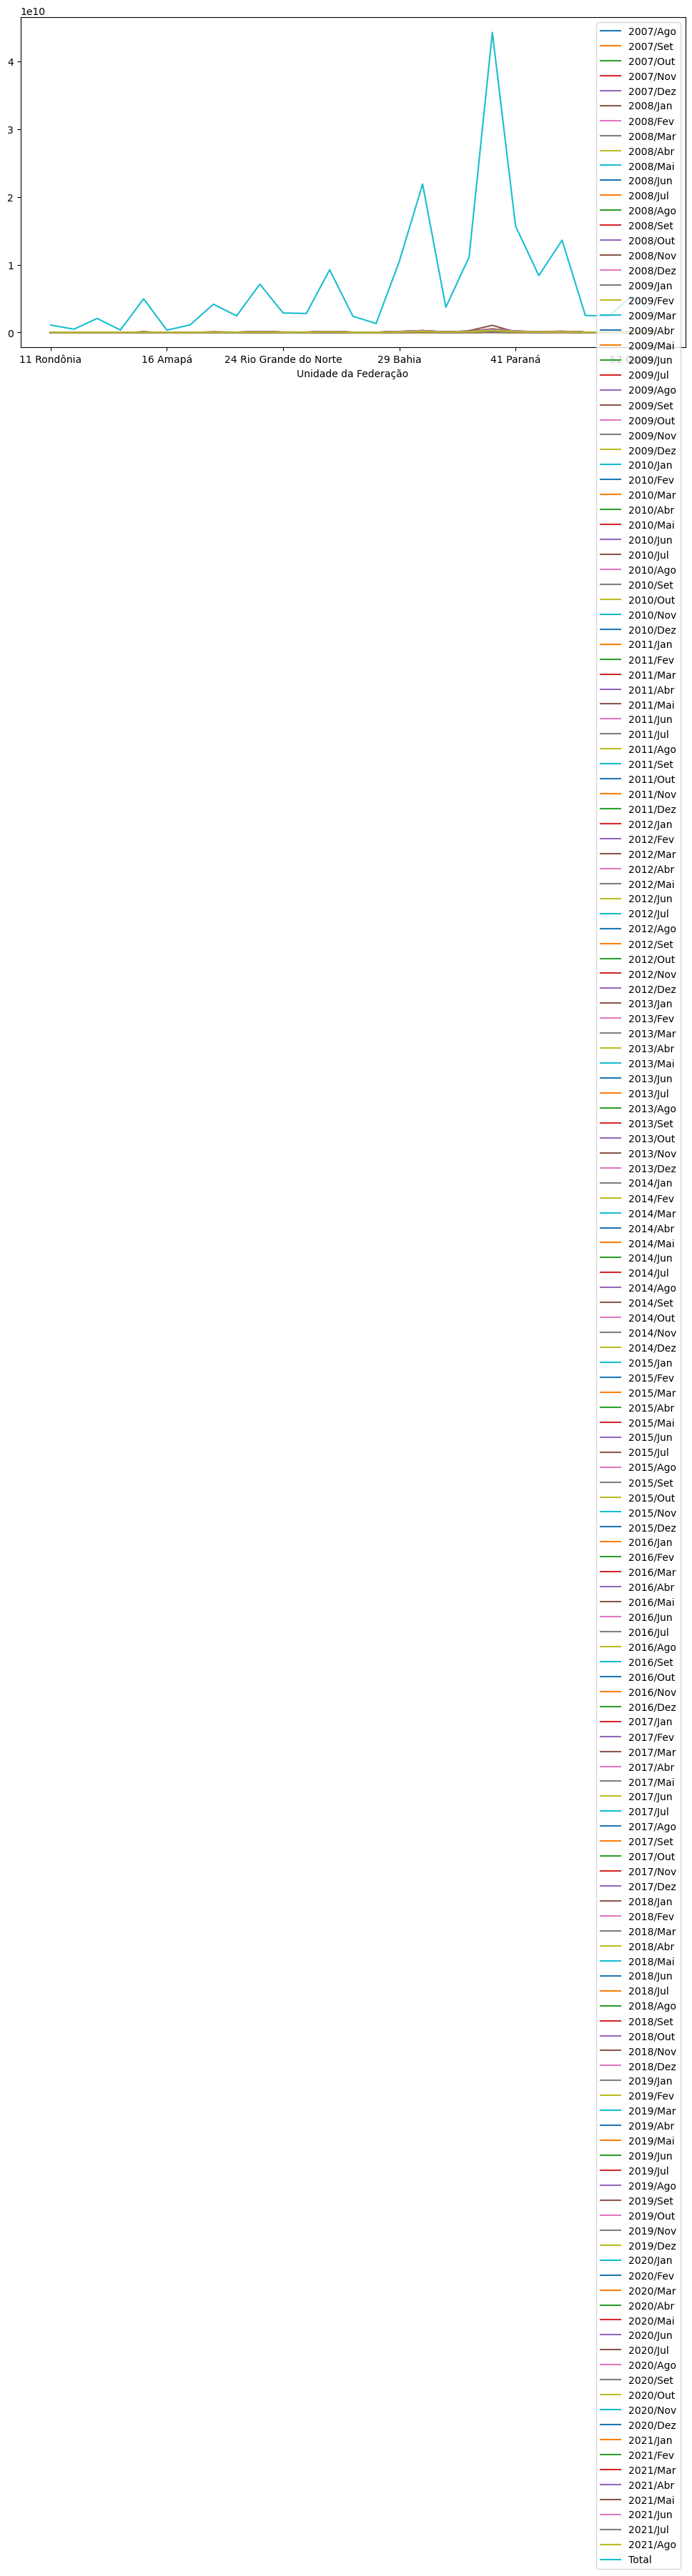

In [391]:
df_1.plot(figsize=(12, 6))

In [392]:
df_1.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


<Axes: >

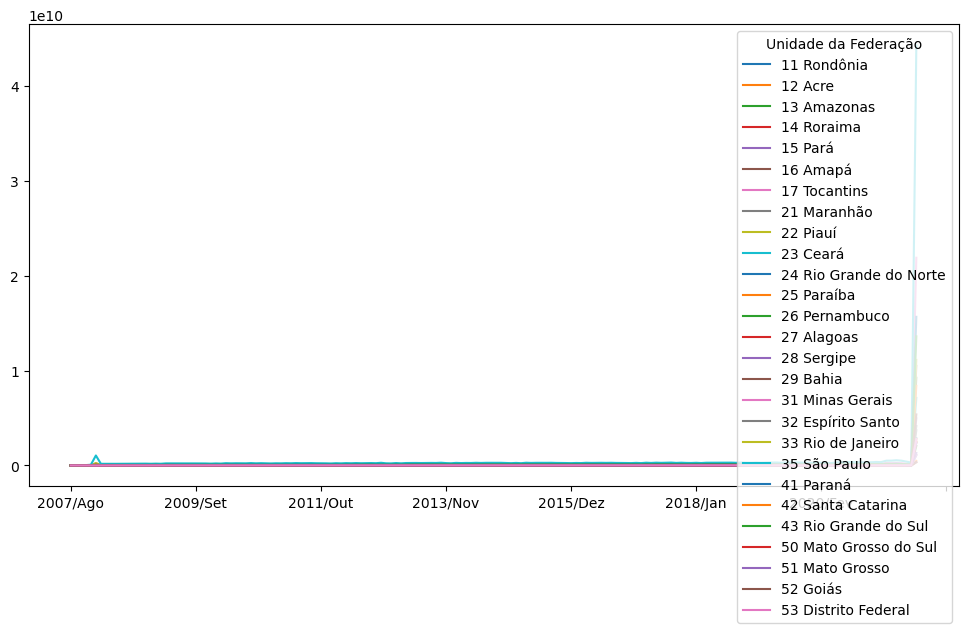

In [393]:
df_1.T.plot(figsize=(12, 6))

In [394]:
df_1.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2021/Mai,1.765986e+07,4.326882e+06,2.397354e+07,3.681418e+06,5.090723e+07,5.672087e+06,1.016178e+07,5.532468e+07,3.255078e+07,1.028260e+08,...,5.734537e+07,1.453727e+08,5.481127e+08,1.918616e+08,1.016615e+08,1.550843e+08,3.688563e+07,3.785947e+07,6.946733e+07,3.243456e+07
2021/Jun,1.443590e+07,3.458187e+06,2.217540e+07,3.475206e+06,4.387659e+07,5.469150e+06,6.349488e+06,5.195857e+07,2.601580e+07,8.191945e+07,...,4.813767e+07,1.249090e+08,5.031610e+08,1.635809e+08,9.305577e+07,1.428123e+08,3.159520e+07,3.493713e+07,6.716235e+07,2.719646e+07
2021/Jul,1.183444e+07,2.302711e+06,2.161494e+07,3.320808e+06,3.371808e+07,4.136951e+06,4.610171e+06,3.777543e+07,1.997285e+07,5.772714e+07,...,3.655087e+07,1.136609e+08,4.043732e+08,1.194080e+08,7.053197e+07,1.128054e+08,2.071197e+07,2.936420e+07,5.789129e+07,2.626552e+07
2021/Ago,7.371335e+06,1.196755e+06,1.380696e+07,2.907871e+06,2.083787e+07,1.875242e+06,2.304080e+06,2.577967e+07,1.522089e+07,3.565001e+07,...,2.712745e+07,9.413736e+07,3.019863e+08,9.118772e+07,4.888500e+07,7.495459e+07,1.130299e+07,1.984925e+07,4.493982e+07,2.215644e+07
Total,1.088060e+09,4.752903e+08,2.061943e+09,3.525463e+08,4.968812e+09,3.371820e+08,1.110345e+09,4.161326e+09,2.450509e+09,7.118540e+09,...,3.710942e+09,1.113187e+10,4.429079e+10,1.567216e+10,8.392939e+09,1.361334e+10,2.516383e+09,2.386584e+09,5.380179e+09,2.778457e+09


In [395]:
df_1.drop('Total', axis=1, inplace=True)

/tmp/ipykernel_26067/1323871906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop('Total', axis=1, inplace=True)


<Axes: >

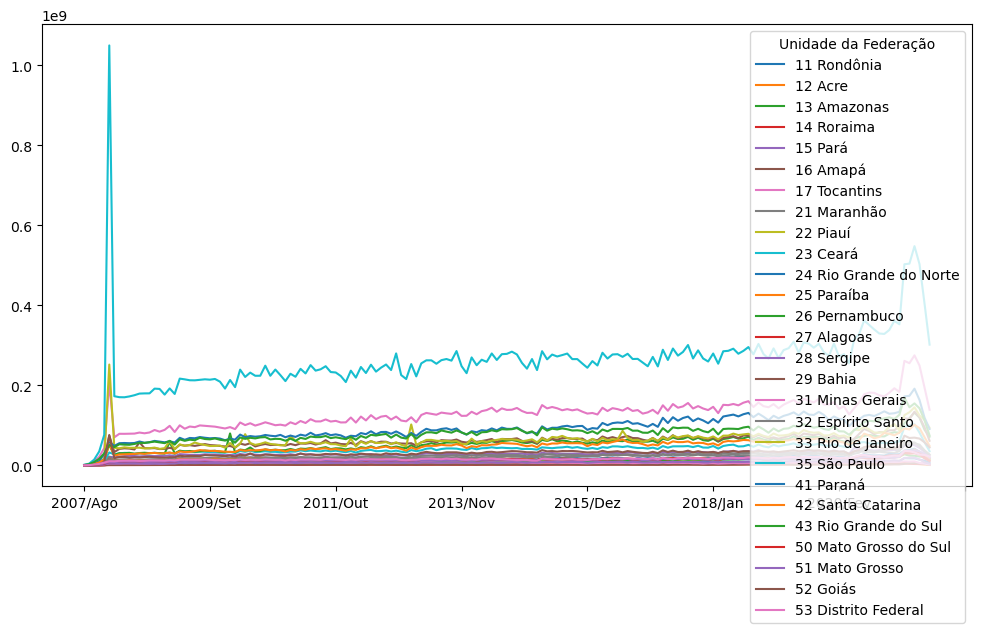

In [396]:
df_1.T.plot(figsize=(12, 6))

In [397]:
df_1.T.max()

Unidade da Federação
11 Rondônia               1.814712e+07
12 Acre                   5.699598e+06
13 Amazonas               2.792379e+07
14 Roraima                5.427227e+06
15 Pará                   5.255833e+07
16 Amapá                  5.672087e+06
17 Tocantins              1.016178e+07
21 Maranhão               5.532468e+07
22 Piauí                  3.255078e+07
23 Ceará                  1.028260e+08
24 Rio Grande do Norte    4.181990e+07
25 Paraíba                3.960246e+07
26 Pernambuco             1.320957e+08
27 Alagoas                3.087517e+07
28 Sergipe                1.972061e+07
29 Bahia                  1.342297e+08
31 Minas Gerais           2.751518e+08
32 Espírito Santo         5.803185e+07
33 Rio de Janeiro         2.521758e+08
35 São Paulo              1.049828e+09
41 Paraná                 1.918616e+08
42 Santa Catarina         1.016615e+08
43 Rio Grande do Sul      1.696877e+08
50 Mato Grosso do Sul     3.688563e+07
51 Mato Grosso            3.785947e+07
52 G

### Desafios
* Reposicionar legenda
* Retocar título da visualização
* Colocar título nos eixos

In [398]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Ano/Mês de Competência')

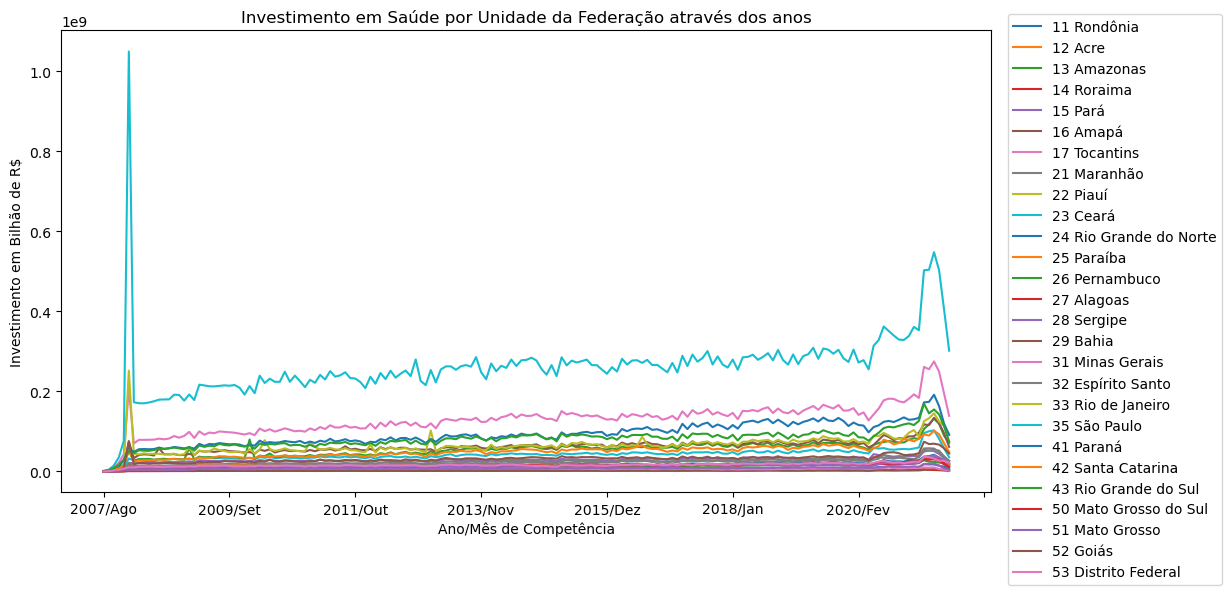

In [399]:
axis = df_1.T.plot(figsize=(12, 6))

axis.legend(bbox_to_anchor=(1.01, 1.05))

plt.title('Investimento em Saúde por Unidade da Federação através dos anos')
plt.ylabel('Investimento em Bilhão de R$')
plt.xlabel('Ano/Mês de Competência')

## Parte II

In [400]:
df_1.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [401]:
df_1.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

<Axes: >

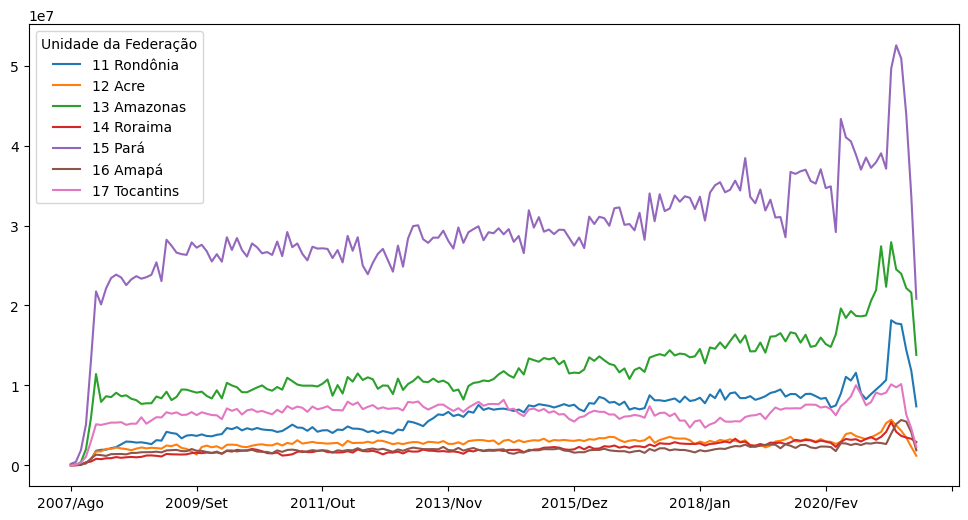

In [402]:
df_1[:7].T.plot(figsize=(12, 6))

In [403]:
import numpy as np

In [404]:
SEED = 42

np.random.seed(SEED)

<Axes: >

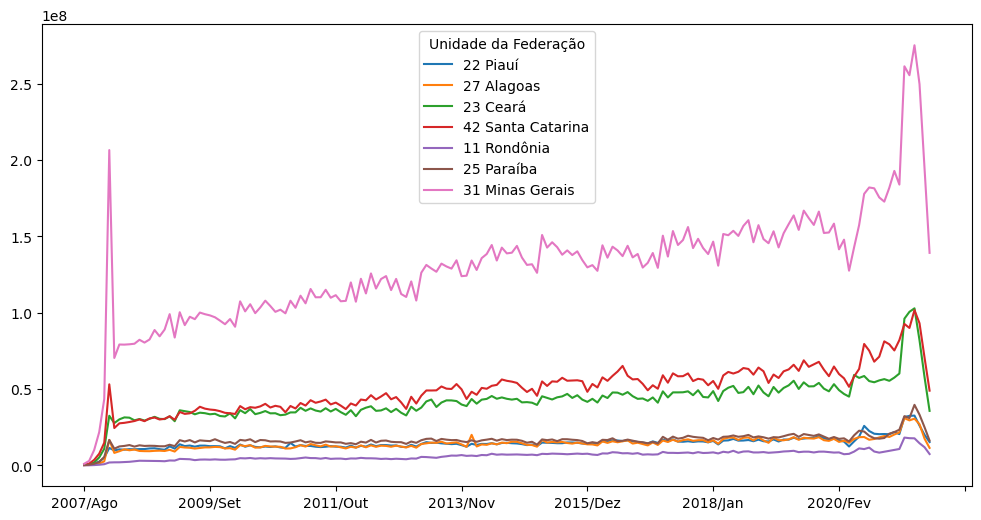

In [405]:
df_1.sample(n=7).T.plot(figsize=(12, 6))

In [406]:
df_1['Total'] = df_1.sum(axis=1)

df_1.head()

/tmp/ipykernel_26067/4095460457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Total'] = df_1.sum(axis=1)


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,9469279.43,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,1.086376e+09
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,4.752890e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,21911210.94,27406458.57,22341042.63,27923786.94,24515920.09,23973537.71,22175398.40,21614943.55,13806958.66,2.056648e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3681417.80,3475205.55,3320807.96,2907871.07,3.510491e+08
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,37925512.28,39042349.46,37113440.70,49625416.13,52558327.29,50907226.77,43876590.47,33718084.12,20837865.89,4.964173e+09


### Desafio 1: Ordernar o Dataframe de maior para o menor

In [407]:
df_1.sort_values(by='Total', 
                 ascending=False, 
                 inplace=True)

df_1.head()

/tmp/ipykernel_26067/3158499994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.sort_values(by='Total',


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.049828e+09,1.730623e+08,1.706213e+08,1.703898e+08,1.725137e+08,...,3.386343e+08,3.614271e+08,3.528464e+08,5.029056e+08,5.044272e+08,5.481127e+08,5.031610e+08,4.043732e+08,3.019863e+08,4.415038e+10
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.064939e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.818334e+08,1.928442e+08,1.838915e+08,2.613767e+08,2.555458e+08,2.751518e+08,2.497139e+08,1.947341e+08,1.391578e+08,2.183900e+10
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.292128e+08,1.305328e+08,1.340772e+08,1.726362e+08,1.740403e+08,1.918616e+08,1.635809e+08,1.194080e+08,9.118772e+07,1.563932e+10
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,1.202913e+08,1.159919e+08,1.267303e+08,1.696877e+08,1.453025e+08,1.550843e+08,1.428123e+08,1.128054e+08,7.495459e+07,1.358802e+10
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.521758e+08,4.412816e+07,4.290791e+07,4.531559e+07,4.395135e+07,...,9.675269e+07,1.034684e+08,8.751876e+07,1.257351e+08,1.329651e+08,1.453727e+08,1.249090e+08,1.136609e+08,9.413736e+07,1.108857e+10


In [408]:
df_1.drop('Total', inplace=True, axis=1)

/tmp/ipykernel_26067/3003381646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop('Total', inplace=True, axis=1)


<Axes: >

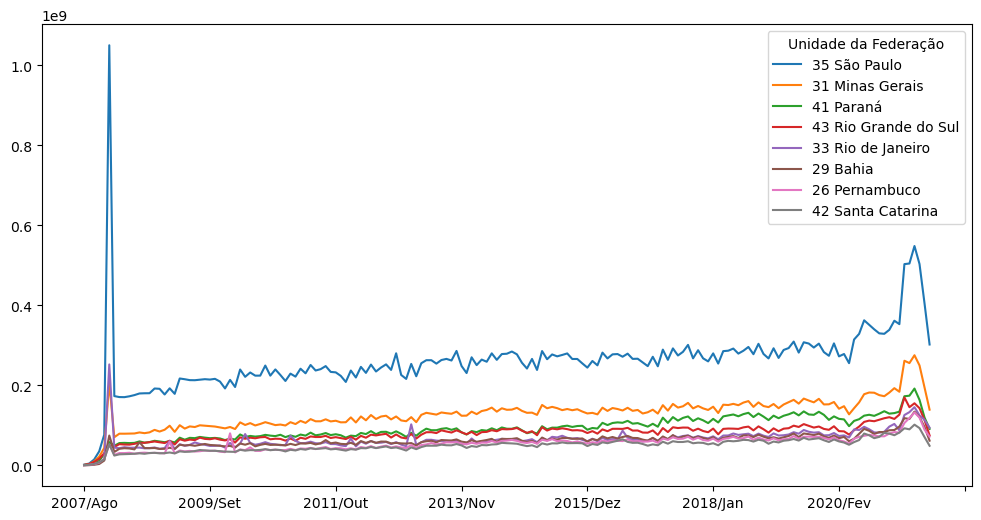

In [409]:
df_1.head(8).T.plot(figsize=(12, 6))

### Desafio 2: Adicione uma coluna para a região do país

In [410]:
REGIOES = {'NORTE': ['Acre', 'Amazonas', 
                     'Roraima', 'Amapá', 
                     'Pará', 'Rondônia', 'Tocantins'],
           'NORDESTE': ['Maranhão', 'Piauí', 
                        'Ceará', 'Rio Grande do Norte', 
                        'Paraíba', 'Pernambuco', 
                        'Alagoas', 'Sergipe', 'Bahia'],
           'CENTRO-OESTE': ['Mato Grosso', 'Mato Grosso do Sul', 
                            'Goiás', 'Distrito Federal'],
           'SUDESTE': ['Minas Gerais', 'Espírito Santo', 
                       'Rio de Janeiro', 'São Paulo'],
           'SUL': ['Paraná', 'Santa Catarina', 
                   'Rio Grande do Sul']}

In [411]:
df_1.reset_index(inplace=True)

df_1.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
0,35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.049828e+09,1.730623e+08,1.706213e+08,1.703898e+08,...,3.286878e+08,3.386343e+08,3.614271e+08,3.528464e+08,5.029056e+08,5.044272e+08,5.481127e+08,5.031610e+08,4.043732e+08,3.019863e+08
1,31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.064939e+08,7.030109e+07,7.911901e+07,7.904632e+07,...,1.727309e+08,1.818334e+08,1.928442e+08,1.838915e+08,2.613767e+08,2.555458e+08,2.751518e+08,2.497139e+08,1.947341e+08,1.391578e+08
2,41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,...,1.352787e+08,1.292128e+08,1.305328e+08,1.340772e+08,1.726362e+08,1.740403e+08,1.918616e+08,1.635809e+08,1.194080e+08,9.118772e+07
3,43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,...,1.176966e+08,1.202913e+08,1.159919e+08,1.267303e+08,1.696877e+08,1.453025e+08,1.550843e+08,1.428123e+08,1.128054e+08,7.495459e+07
4,33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.521758e+08,4.412816e+07,4.290791e+07,4.531559e+07,...,8.392387e+07,9.675269e+07,1.034684e+08,8.751876e+07,1.257351e+08,1.329651e+08,1.453727e+08,1.249090e+08,1.136609e+08,9.413736e+07


In [412]:
regioes = []

for idx, row in df_1.iterrows():
    for regiao, estados in REGIOES.items():
        if any(row['Unidade da Federação'].endswith(estado) for estado in estados):
            regioes.append(regiao)

df_1['Região'] = None            
df_1['Região'] = regioes
df_1.set_index('Unidade da Federação', inplace=True)

/tmp/ipykernel_26067/1691286401.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Região'] = None
/tmp/ipykernel_26067/1691286401.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Região'] = regioes


In [413]:
df_1.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.049828e+09,1.730623e+08,1.706213e+08,1.703898e+08,1.725137e+08,...,3.386343e+08,3.614271e+08,3.528464e+08,5.029056e+08,5.044272e+08,5.481127e+08,5.031610e+08,4.043732e+08,3.019863e+08,SUDESTE
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.064939e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.818334e+08,1.928442e+08,1.838915e+08,2.613767e+08,2.555458e+08,2.751518e+08,2.497139e+08,1.947341e+08,1.391578e+08,SUDESTE
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.292128e+08,1.305328e+08,1.340772e+08,1.726362e+08,1.740403e+08,1.918616e+08,1.635809e+08,1.194080e+08,9.118772e+07,SUL
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,1.202913e+08,1.159919e+08,1.267303e+08,1.696877e+08,1.453025e+08,1.550843e+08,1.428123e+08,1.128054e+08,7.495459e+07,SUL
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.521758e+08,4.412816e+07,4.290791e+07,4.531559e+07,4.395135e+07,...,9.675269e+07,1.034684e+08,8.751876e+07,1.257351e+08,1.329651e+08,1.453727e+08,1.249090e+08,1.136609e+08,9.413736e+07,SUDESTE


## Parte III

In [414]:
colunas_interessadas = df_1.columns[6:]

df_1 = df_1[colunas_interessadas]

<Axes: >

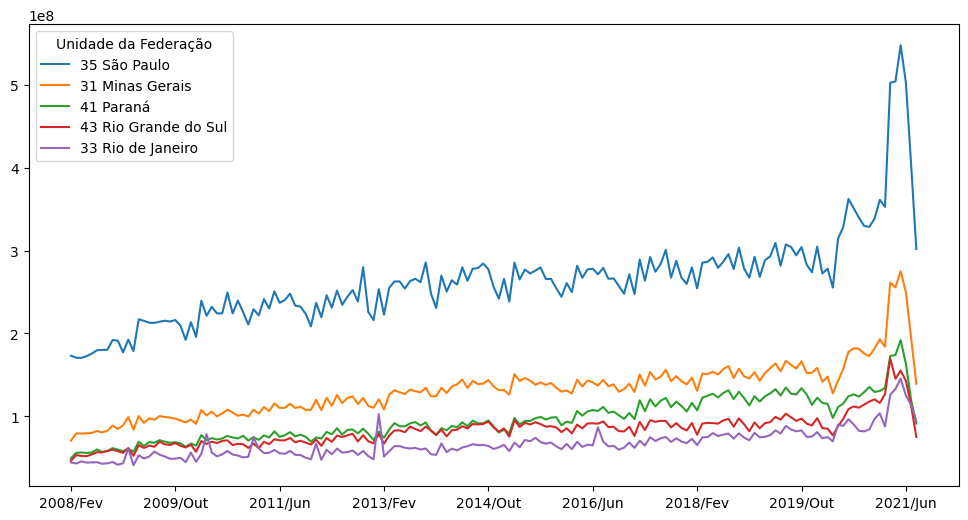

In [417]:
df_1.head(5).iloc[:, :-1].T.plot(figsize=(12, 6))

In [422]:
from matplotlib import pyplot as plt
from matplotlib import ticker

### Desafio 1: Refinar o layout do gráfico

Text(0.5, 1.0, 'Investimento em Saúde vs. Ano/Mês por Unidade Federativa')

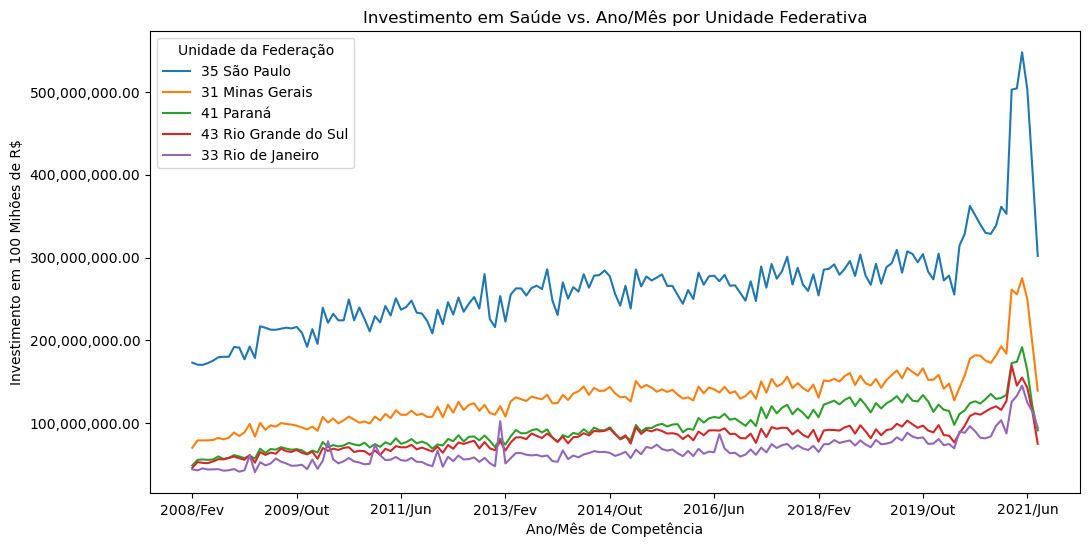

In [430]:
ax = df_1.head(5).iloc[:, :-1].T.plot(figsize=(12, 6))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xlabel('Ano/Mês de Competência')
plt.ylabel('Investimento em 100 Mihões de R$')
plt.title('Investimento em Saúde vs. Ano/Mês por Unidade Federativa')

### Desafio 2: Plotar apenas uma região do Brasil

Text(0.5, 1.0, 'Investimento em Saúde vs. Ano/Mês por Unidade Federativa')

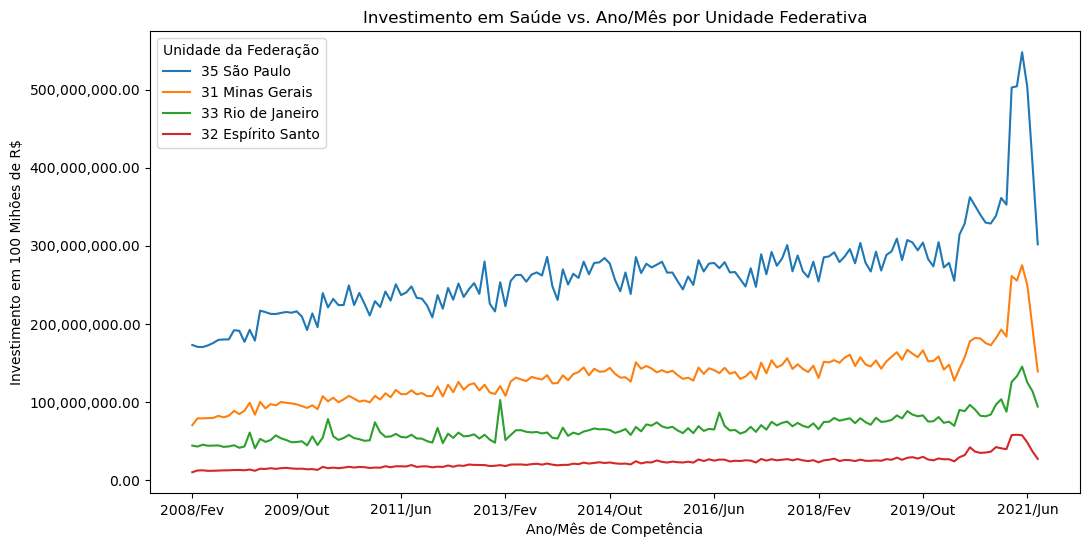

In [432]:
ax = df_1[df_1['Região'] == 'SUDESTE'].iloc[:, :-1].T.plot(figsize=(12, 6))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.xlabel('Ano/Mês de Competência')
plt.ylabel('Investimento em 100 Mihões de R$')
plt.title('Investimento em Saúde vs. Ano/Mês por Unidade Federativa')

### Desafio 2: Cruzar os dados existentes com dados de surtos de dengue